#Richiesta 1


In [182]:
import pandas as pd

url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)


#Si richiede di verificare le dimensioni del dataset e i relativi metadati;
print(df.shape)
df_filtered = df.drop_duplicates()
df_filtered['date'] = pd.to_datetime(df['date'])
df.sample(50)

(388928, 67)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
327060,SSD,Africa,South Sudan,2022-04-05,17286.0,0.0,10.429,138.0,0.0,0.000,...,NaN,NaN,NaN,57.85,0.433,1.091317e+07,NaN,NaN,NaN,NaN
141987,GIN,Africa,Guinea,2020-10-17,11022.0,0.0,38.286,69.0,0.0,0.429,...,NaN,17.450,0.300,61.60,0.477,1.385935e+07,NaN,NaN,NaN,NaN
335572,CHE,Europe,Switzerland,2020-03-20,2373.0,0.0,286.857,20.0,0.0,2.571,...,28.9,NaN,4.530,83.78,0.955,8.740471e+06,NaN,NaN,NaN,NaN
134744,GRD,North America,Grenada,2022-01-22,9535.0,0.0,266.571,203.0,0.0,0.429,...,NaN,NaN,3.700,72.40,0.779,1.254590e+05,NaN,NaN,NaN,NaN
2448,OWID_AFR,NaN,Africa,2022-06-30,12487928.0,0.0,6623.000,255917.0,0.0,35.714,...,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,NaN,NaN,NaN
113105,FLK,South America,Falkland Islands,2021-11-30,79.0,0.0,0.000,NaN,0.0,0.000,...,NaN,NaN,NaN,81.44,NaN,3.801000e+03,NaN,NaN,NaN,NaN
368794,VIR,North America,United States Virgin Islands,2023-02-02,24475.0,0.0,29.429,129.0,0.0,0.000,...,NaN,NaN,NaN,80.58,NaN,9.947900e+04,NaN,NaN,NaN,NaN
318618,SLB,Oceania,Solomon Islands,2020-03-29,NaN,0.0,0.000,NaN,0.0,0.000,...,NaN,35.890,1.400,73.00,0.567,7.242720e+05,NaN,NaN,NaN,NaN
22137,AUT,Europe,Austria,2021-07-04,641128.0,630.0,90.000,12962.0,22.0,3.143,...,30.9,NaN,7.370,81.54,0.922,8.939617e+06,8922.5990,7.06,5.51,1000.05743
70599,COL,South America,Colombia,2023-04-24,6364014.0,0.0,67.143,142706.0,0.0,1.143,...,13.5,65.386,1.710,77.29,0.767,5.187403e+07,NaN,NaN,NaN,NaN


Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente;

In [183]:
df = df[df['continent'].notna()]

df_filtered = df[df['continent'].notna()]

continenti = df_filtered['continent'].unique()
print(continenti)

casi_per_continente = {}
for continente in continenti:
  casi_per_continente[continente]= df_filtered[df_filtered['continent']==continente]['new_cases'].sum()


for continente, caso in casi_per_continente.items():
  print(f'{continente}:{casi_per_continente[continente]}')


['Asia' 'Europe' 'Africa' 'Oceania' 'North America' 'South America']
Asia:301451451.0
Europe:252417184.0
Africa:13141439.0
Oceania:14814266.0
North America:124530677.0
South America:68844492.0


Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, ne confronti i seguenti relativi descrittori statistici: valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente);

In [184]:
continente1 = 'Asia'
continente2 = 'Europe'


dati_asia = df_filtered[df_filtered['continent']==continente1]
dati_europa = df_filtered[df_filtered['continent']==continente2]

casi_totali_asia = dati_asia['new_cases'].sum()
casi_totali_europa = dati_europa['new_cases'].sum()
casi_totali_mondo = df_filtered['new_cases'].sum()

confronto_dati = pd.DataFrame({
    "Continente" : [continente1, continente2],
    "Casi Totali" : [casi_totali_asia, casi_totali_europa],
    "Massimo Casi" :[casi_totali_asia.max(), casi_totali_europa.max()],
    "Media Casi" : [casi_totali_asia.mean(), casi_totali_europa.mean()],
    "Percentuale vs Mondo" : [f"{((casi_totali_asia / casi_totali_mondo) * 100):.2f}%",f"{((casi_totali_europa / casi_totali_mondo) * 100):.2f}%"
    ]
    }
                              )

confronto_dati.head()

,Continente,Casi Totali,Massimo Casi,Media Casi,Percentuale vs Mondo
0,Asia,301451451.0,301451451.0,301451451.0,38.89%
1,Europe,252417184.0,252417184.0,252417184.0,32.56%


Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico

adeguato l'evoluzione del casi totali rispetto alla data. Mostrare poi con un

grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario). Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali;\\

<ipython-input-185-97418855915e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dati_europa['date'] = pd.to_datetime(dati_europa['date'])


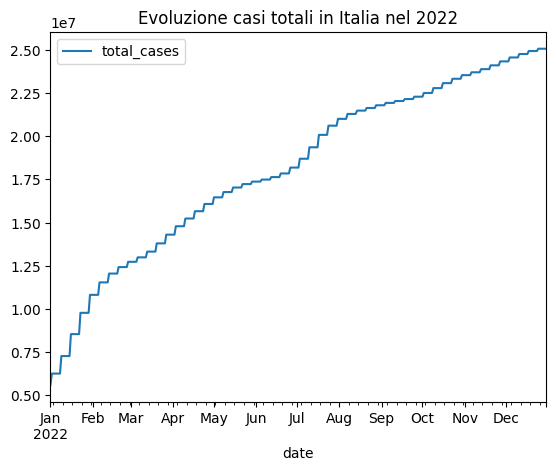

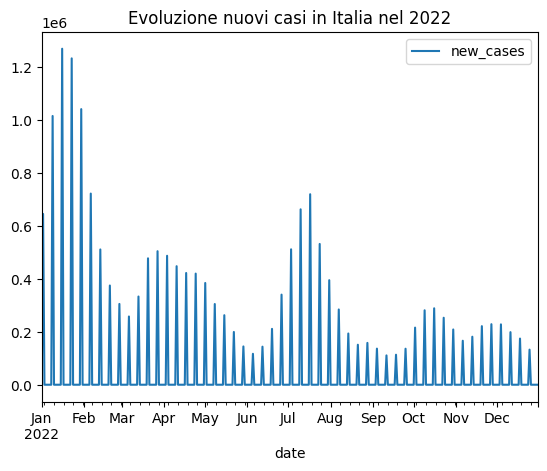

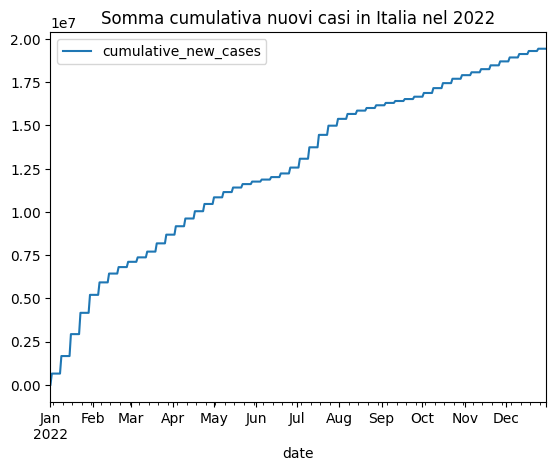

In [185]:
dati_europa['date'] = pd.to_datetime(dati_europa['date'])
dati_italia_2022 = dati_europa.loc[(dati_europa['location'] == 'Italy') & (dati_europa['date'].dt.year == 2022)] #filtraggio dati
df_italia = pd.DataFrame(dati_italia_2022)

grafico1 = df_italia.plot(x='date', y='total_cases', title='Evoluzione casi totali in Italia nel 2022') #Il grafico mostra un andamento crescente dei casi totali nel corso del 2022, raggiungendo il picco verso la fine dell'anno.

grafico2 = df_italia.plot(x='date', y='new_cases', title = 'Evoluzione nuovi casi in Italia nel 2022') #avendo già filtrato i dati nel 2022, so già che i nuovi casi sono del 2022

df_italia['cumulative_new_cases'] = df_italia['new_cases'].cumsum()
grafico3 = df_italia.plot(x='date', y='cumulative_new_cases', title='Somma cumulativa nuovi casi in Italia nel 2022')

# -Grafico1 e Grafico3 mostrano un trend generale ascendente, indicando un aumento complessivo del numero di casi di COVID-19 in Italia nel 2022.Entrambi i grafici riflettono la diffusione del virus, con il grafico dei casi totali che rappresenta il numero cumulativo di persone infette e il grafico dei nuovi casi cumulativi che mostra l'accumulo di nuove infezioni nel tempo.

Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo

<ipython-input-186-8e7d14977b16>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dati_nazioni['date'] = pd.to_datetime(dati_nazioni['date'])
<ipython-input-186-8e7d14977b16>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dati_nazioni['icu_diff'] = dati_nazioni.groupby('location')['icu_patients'].diff()


count    3801.000000
mean       -0.043673
std        52.714072
min      -280.000000
25%       -18.000000
50%        -1.000000
75%        13.000000
max       478.000000
Name: icu_diff, dtype: float64

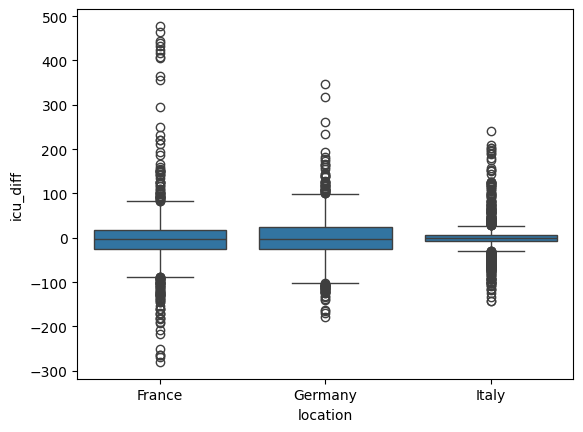

In [186]:
import seaborn as sns

nazioni = ['France', 'Germany', 'Italy']
dati_nazioni = df_filtered[df_filtered['location'].isin(nazioni)]
dati_nazioni['date'] = pd.to_datetime(dati_nazioni['date'])


dati_nazioni_filtered = dati_nazioni[(dati_nazioni['date'].dt.year >= 2022) &
                                    (dati_nazioni['date'].dt.year <= 2023) &
                                    (dati_nazioni['date'].dt.month>= 5) &
                                    (dati_nazioni['date'].dt.month <= 4) &
                                    (dati_nazioni['location'].isin(['Italy', 'Germany', 'France']))]

dati_nazioni['icu_diff'] = dati_nazioni.groupby('location')['icu_patients'].diff()

sns.boxplot(x='location', y='icu_diff', data=dati_nazioni)
dati_nazioni['icu_diff'].describe()

#Mediane: Italia > Germania > Francia (l'Italia ha avuto in media il maggior numero di pazienti in ICU).
#Variabilità: Italia > Germania > Francia (maggiore variabilità in Italia, minore in Germania).
#Outlier: Presenti in tutti e tre i paesi, vediamo infatti una deviazione standard molto alta.

Riguardo le nazioni di Italia, Germania, Francia, Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna - se ci sono dati nulli suggerire se gestirli con sostituzione o meno

<ipython-input-187-1f3089f03fc5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dati_nazioni['date'] = pd.to_datetime(dati_nazioni['date'])
<ipython-input-187-1f3089f03fc5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dati_nazioni_2023.dropna(subset=["hosp_patients"], inplace=True)
<ipython-input-187-1f3089f03fc5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dati_nazi

<Axes: xlabel='hosp_patients', ylabel='location'>

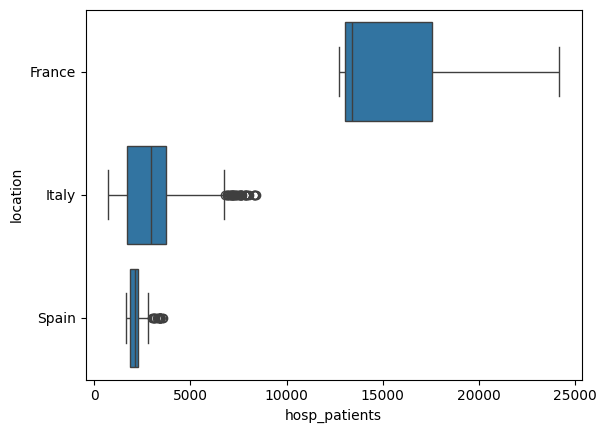

In [187]:


nazioni = ['France', 'Germany', 'Italy', 'Spain']
dati_nazioni = df_filtered[df_filtered['location'].isin(nazioni)]
dati_nazioni['date'] = pd.to_datetime(dati_nazioni['date'])
dati_nazioni_2023 = dati_nazioni[dati_nazioni['date'].dt.year==2023]

pazienti_totali_nazione = dati_nazioni_2023.groupby("location")["hosp_patients"].sum()


#Metodo 1: rimuoviamo righe con valori nulli
dati_nazioni_2023.dropna(subset=["hosp_patients"], inplace=True)
dati_nazioni
#Questo però ci potrebbe far perdere dei dati

#metodo 2: sostituiamo con 0
dati_nazioni_2023["hosp_patients"].fillna(0, inplace=True)

#stampiamo in un boxplot
sns.boxplot(x ='hosp_patients', y = 'location', data = dati_nazioni_2023)